## 匯入資料

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
iris = load_iris()
X = pd.DataFrame(iris['data'], columns=iris['feature_names'])
y = pd.DataFrame(iris['target'], columns=['target'])
iris = pd.concat([X,y], axis=1)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 檢查資料

In [3]:
print(iris.isnull().values.sum())
print("資料筆數:", iris.shape)
print("資料的欄位名稱，分別是:", iris.keys())
print("第一筆的資料內容:", iris.iloc[0,::])
print("第一筆的預測目標:",iris['target'][0])


0
資料筆數: (150, 5)
資料的欄位名稱，分別是: Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')
第一筆的資料內容: sepal length (cm)    5.1
sepal width (cm)     3.5
petal length (cm)    1.4
petal width (cm)     0.2
target               0.0
Name: 0, dtype: float64
第一筆的預測目標: 0


## 製作鳶尾花的萼片、花瓣長度與鳶尾花種類的分布圖

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


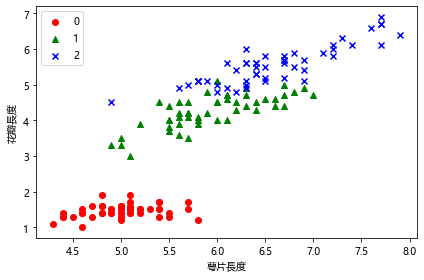

In [4]:
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] 
markers = ('o', '^', 'x')
colors = ('red', 'green', 'blue')
cmap = ListedColormap(colors[:len(np.unique(y))])
y = iris['target'].values
for i, t in enumerate(np.unique(y)):  
    p = iris[y == t]
    plt.scatter(x=p['sepal length (cm)'],  y=p['petal length (cm)'], c=cmap(i), marker=markers[i],  label=t)
plt.xlabel('萼片長度')
plt.ylabel('花瓣長度')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## 只使用兩種鳶尾花

In [5]:
iris = iris[['sepal length (cm)','petal length (cm)','target']]
iris = iris[iris['target'].isin([1,2])] 
print(iris['target'].value_counts())

1    50
2    50
Name: target, dtype: int64


## 分割資料與資料前處理

In [6]:
train_X, test_X, train_y, test_y = train_test_split(
    iris[['sepal length (cm)','petal length (cm)']], iris[['target']], 
    test_size=0.3, random_state=0)
sc = StandardScaler()
train_X_std = sc.fit_transform(train_X)
test_X_std = sc.fit_transform(test_X)
print("訓練集的維度大小:   ", train_X_std.shape)
print("測試集的維度大小:   ", test_X_std.shape)

訓練集的維度大小:    (70, 2)
測試集的維度大小:    (30, 2)


## 建立與訓練邏輯迴歸模型

In [7]:
model = LogisticRegression()
model.fit(train_X_std, train_y['target'])
print ('係數: ', model.coef_)
print ('截距: ',model.intercept_)

係數:  [[-0.34765442  3.24909418]]
截距:  [0.23340114]


## 預測模型

In [8]:
print(model.predict(test_X_std))
print(test_y['target'].values)
print(model.predict_proba(test_X_std))

[1 2 1 2 2 2 1 2 2 2 2 2 2 1 1 1 2 1 2 1 1 2 1 2 1 1 1 2 2 1]
[1 2 1 2 2 2 1 2 2 2 2 2 2 1 1 1 1 1 1 1 1 2 1 2 1 1 1 2 2 2]
[[0.6013206  0.3986794 ]
 [0.04650697 0.95349303]
 [0.51803756 0.48196244]
 [0.00194219 0.99805781]
 [0.01632968 0.98367032]
 [0.01934199 0.98065801]
 [0.71668035 0.28331965]
 [0.43519795 0.56480205]
 [0.0241716  0.9758284 ]
 [0.22766104 0.77233896]
 [0.04650697 0.95349303]
 [0.2097249  0.7902751 ]
 [0.04902982 0.95097018]
 [0.60274214 0.39725786]
 [0.99488731 0.00511269]
 [0.97422994 0.02577006]
 [0.43519795 0.56480205]
 [0.8966359  0.1033641 ]
 [0.22870597 0.77129403]
 [0.74810837 0.25189163]
 [0.99516188 0.00483812]
 [0.08715444 0.91284556]
 [0.9450027  0.0549973 ]
 [0.34321352 0.65678648]
 [0.8971845  0.1028155 ]
 [0.99859267 0.00140733]
 [0.62898288 0.37101712]
 [0.21906756 0.78093244]
 [0.04902982 0.95097018]
 [0.51951877 0.48048123]]


In [9]:
cm = confusion_matrix(test_y['target'],model.predict(test_X_std))
print(cm)

[[13  2]
 [ 1 14]]


## 繪製資料與邏輯迴歸分布圖

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


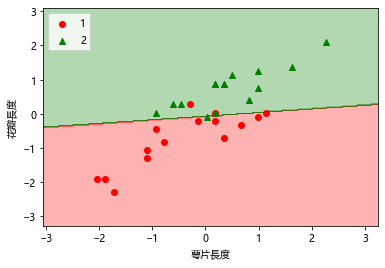

In [10]:
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
X = test_X_std
y = test_y['target'].values
markers = ('o', '^', 'x')
colors = ('red', 'green', 'blue')
cmap = ListedColormap(colors[:len(np.unique(y))])
x0min, x0max = X[:, 0].min() - 1, X[:, 0].max() + 1
x1min, x1max = X[:, 1].min() - 1, X[:, 1].max() + 1
a, b = np.meshgrid(np.arange(x0min, x0max, 0.03), np.arange(x1min, x1max, 0.03)) 
Z = model.predict(np.array([a.ravel(), b.ravel()]).T) 
Z = Z.reshape(a.shape)
plt.contourf(a, b, Z, alpha=0.3, cmap=cmap)
plt.xlim(a.min(), a.max())
plt.ylim(b.min(), b.max())
for i, t in enumerate(np.unique(y)):  
    p = X[y == t]
    plt.scatter(x=p[:,0],  y=p[:,1], c=cmap(i), marker=markers[i],  label=t)
plt.xlabel('萼片長度')
plt.ylabel('花瓣長度')
plt.legend(loc='upper left')
plt.show()